In [124]:
import stim 
import pymatching

d = 5
T = 5


stim_circ = stim.Circuit.generated("repetition_code:memory",
                                distance=d,
                                rounds=T,
                                after_clifford_depolarization=1e-2, #two-qubit-fidelity,
                                after_reset_flip_probability=1e-2, #reset error,
                                before_measure_flip_probability=3e-2, #measurement error,
                                before_round_data_depolarization=1e-2) #idle error)

matching = pymatching.Matching.from_detector_error_model(stim_circ.detector_error_model())

In [125]:
matching.set_boundary_nodes({23, 19})

In [126]:
import numpy as np
from soft_info import counts_to_det_syndr
count_key = '00100 0110 0110 0110 0000 0000'
count_key = '11000 0100 0100 0100 0000 0000'
array_processed_str = counts_to_det_syndr(count_key, _resets=True)

array_processed_str = np.array([0]*8 + [0, 0, 0, 0] + [0]*4 + [0,0,0,1] + [0, 0, 0, 1])
edges = matching.decode_to_edges_array(array_processed_str)
flip = matching.decode(array_processed_str)
print(edges)
print(flip)

[]
[0]


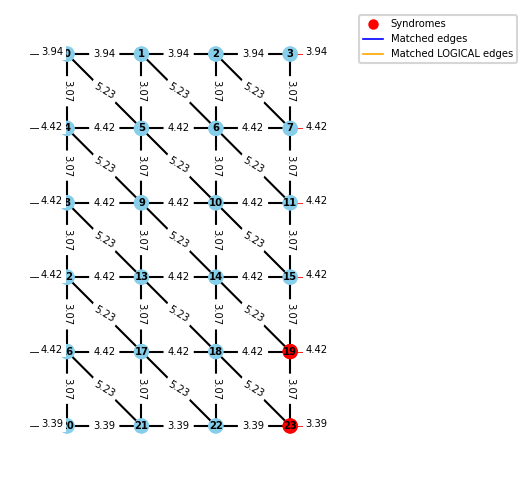

In [127]:
from soft_info import draw_matching_graph

draw_matching_graph(matching, d, T, figsize=(3, 3), scale_factor=0.4, matched_edges=edges, syndromes=array_processed_str)